In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. Load the data

In [47]:
data = pd.read_csv('digit-recognizer/train.csv')

In [48]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data.shape

(42000, 785)

In [50]:
data = np.array(data)

In [51]:
row, col = data.shape

# Shuffle the data
np.random.shuffle(data)

# 2. Split the data into Train & Val

In [52]:
# Split validation data and transpose it
data_val = data[0:1000].T

Y_val = data_val[0]
X_val = data_val[1:col]
X_val = X_val / 255.

In [53]:
# Split training data and transpose it
train_data = data[1000:row].T
Y_train = train_data[0]
X_train = train_data[1:col]
X_train = X_train / 255.

In [54]:
print("X_train shape: ", X_train.shape)

X_train shape:  (784, 41000)


# 3. Constructing the Neural Network Model

In [55]:
# Initialize parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

In [56]:
# Rectified Linear Unit Function (ReLU)
def ReLU(Z):
    return np.maximum(0, Z)

In [57]:
# Softmax Activation Function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [58]:
# Forward propagation
def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

In [59]:
# function to One Hot Encode
def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

In [60]:
# Derivative of ReLU
def deriv_ReLU(Z):
    return Z > 0

In [61]:
# Backward propagation
def backward(Z1, A1, Z2, A2, W1, W2, X, Y):  
    one_hot_Y = one_hot_encode(Y)
    
    # Layer [2] - Output Layer
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / row * dZ2.dot(A1.T)
    db2 = 1/ row * np.sum(dZ2)
    
    # Layer [1] - Hidden Layer
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / row * dZ2.dot(X.T)
    db1 = 1/ row * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

In [62]:
# Update Parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): # alpha => learning rate
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2

In [63]:
# Predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

In [64]:
# Accuracy
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [65]:
# Gradient Descent
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
            
    return W1, b1, W2, b2

In [66]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[4 4 5 ... 7 4 1] [2 1 2 ... 4 2 3]
Accuracy:  0.0852439024390244
Iteration:  10
[2 2 2 ... 9 6 4] [2 1 2 ... 4 2 3]
Accuracy:  0.22509756097560976
Iteration:  20
[2 1 1 ... 9 4 3] [2 1 2 ... 4 2 3]
Accuracy:  0.3061219512195122
Iteration:  30
[2 1 1 ... 9 3 3] [2 1 2 ... 4 2 3]
Accuracy:  0.3816341463414634
Iteration:  40
[2 1 2 ... 9 3 3] [2 1 2 ... 4 2 3]
Accuracy:  0.4614146341463415
Iteration:  50
[2 1 2 ... 9 3 3] [2 1 2 ... 4 2 3]
Accuracy:  0.5284146341463415
Iteration:  60
[2 1 2 ... 9 2 3] [2 1 2 ... 4 2 3]
Accuracy:  0.5810975609756097
Iteration:  70
[2 1 2 ... 9 2 3] [2 1 2 ... 4 2 3]
Accuracy:  0.6095853658536585
Iteration:  80
[2 1 2 ... 4 2 3] [2 1 2 ... 4 2 3]
Accuracy:  0.637219512195122
Iteration:  90
[2 1 2 ... 4 2 3] [2 1 2 ... 4 2 3]
Accuracy:  0.6740731707317074
Iteration:  100
[2 1 2 ... 4 2 3] [2 1 2 ... 4 2 3]
Accuracy:  0.7009024390243902
Iteration:  110
[2 1 2 ... 4 2 3] [2 1 2 ... 4 2 3]
Accuracy:  0.7223658536585366
Iteration:  120
[2 1 2 ... 

In [67]:
# Make predictions
def make_preds(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [68]:
# Perform predictions
def test_preds(index, W1, b1, W2, b2):
    current_img = X_train[:, index, None]
    prediction = make_preds(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_img = current_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_img, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


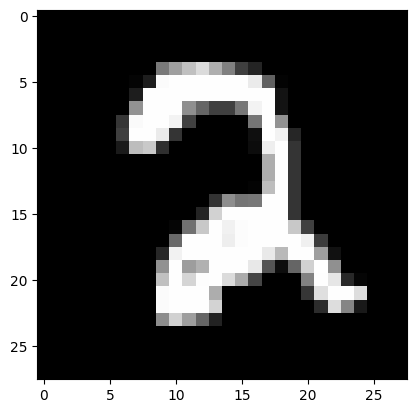

Prediction:  [1]
Label:  1


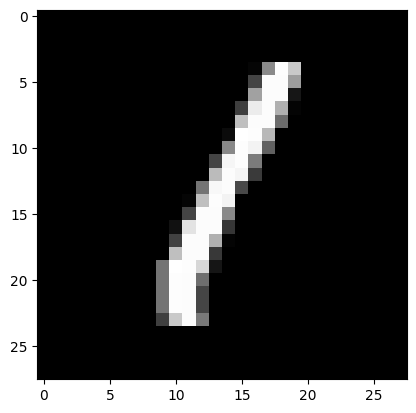

Prediction:  [2]
Label:  2


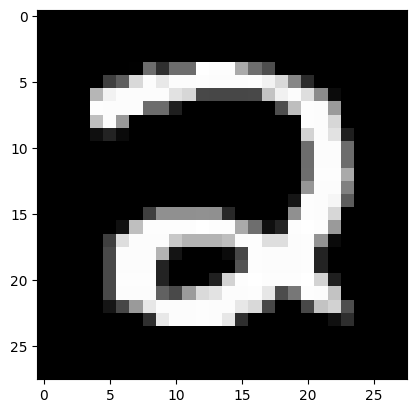

Prediction:  [4]
Label:  4


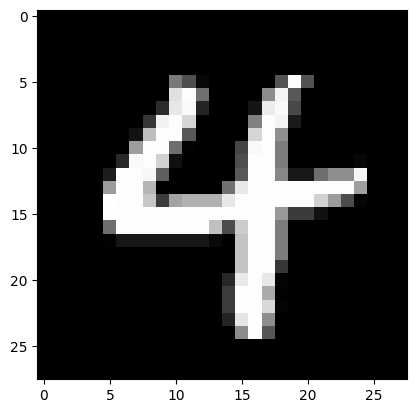

Prediction:  [6]
Label:  6


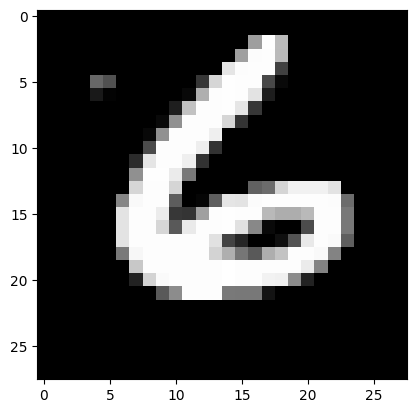

Prediction:  [2]
Label:  2


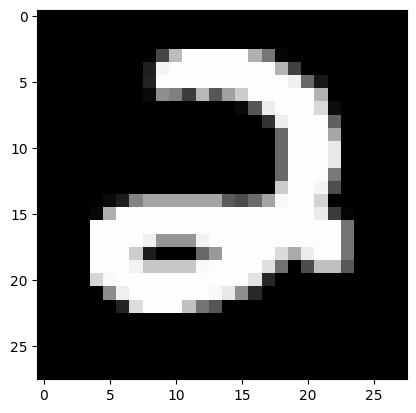

Prediction:  [0]
Label:  0


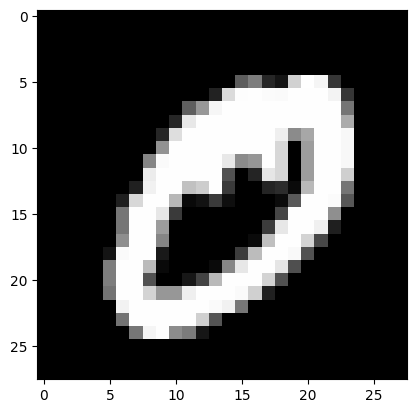

Prediction:  [5]
Label:  5


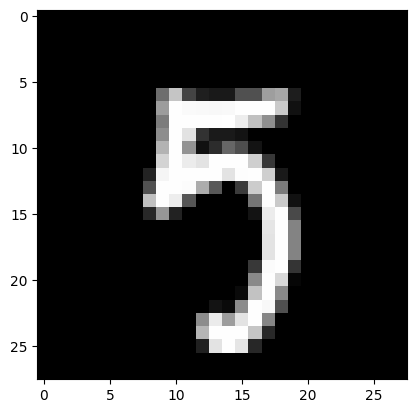

Prediction:  [8]
Label:  8


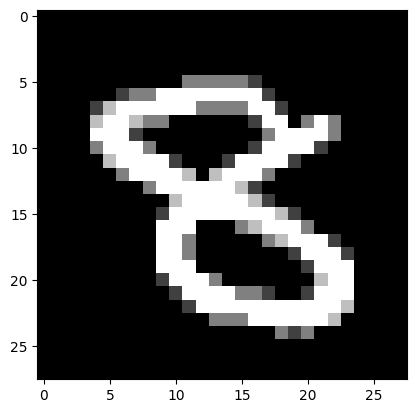

Prediction:  [7]
Label:  7


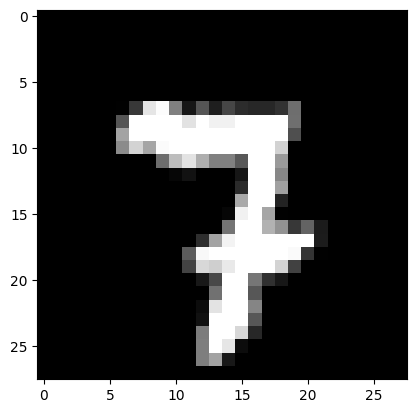

In [70]:
# Display images and their true & predicted labels
for i in range(10):
    test_preds(i, W1, b1, W2, b2)